In [ ]:
!pip install dlib

In [1]:
!wget https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2

--2024-04-23 08:01:50--  https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davisking/dlib-models/master/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2024-04-23 08:01:50--  https://raw.githubusercontent.com/davisking/dlib-models/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   153MB/s    in 0.4s 

In [2]:
!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

In [3]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

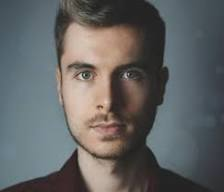

In [4]:
img_path = "/content/human.jpg"
img = cv2.imread(img_path)
cv2_imshow(img)


In [5]:
# load the face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

In [6]:
# image = cv2.imread(img_path)
# image = cv2.resize(image, (600, 500))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect th faces
faces = detector(gray)

In [7]:
faces

rectangles[[(54, 54) (158, 158)]]

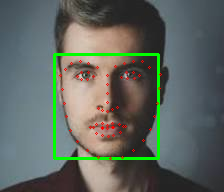

In [14]:
cpy = img.copy()

for face in faces:
    # extract the coordinates of the bounding box
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    cv2.rectangle(cpy, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # # apply the shape predictor to the face ROI
    shape = predictor(gray, face)
    # # #draw all points
    for n in range(0, 68):
        x = shape.part(n).x
        y = shape.part(n).y
        cv2.circle(cpy, (x, y), 1, (0, 0, 255), 1)
    # draw specific point


cv2_imshow(cpy)

In [ ]:
https://colab.research.google.com/drive/1cudsaB84pMbAm1b70zBLPwtDGzo5YQBX?usp=sharing

